# HW7

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance

## Importing Data 

In [2]:
# read data into memory
train_data_set = np.genfromtxt("hw07_training_images.csv", delimiter = ",")
train_labels = np.genfromtxt("hw07_training_labels.csv", delimiter=",")
test_data_set = np.genfromtxt("hw07_test_images.csv", delimiter = ",")
test_labels = np.genfromtxt("hw07_test_labels.csv", delimiter=",")

X = train_data_set[:,]
X_test = test_data_set[:,]
y = train_labels[:,]
y_test = test_labels[:,]

# get number of classes and number of samples
classes = np.unique(train_labels)
K = len(classes) #no of classes
N = X.shape[0]
D = X.shape[1]


# Parameter estimation and Eigen Decomposition

In [3]:
sample_means = [np.mean(X[y== (c + 1)], axis = 0) for c in range(K)]
point_mean = np.mean(sample_means,axis=0)
#sample_cov = np.cov(np.transpose(X))

btw = np.zeros((D,D))
wth = np.zeros((D,D))
for i in range(K):
    #between
    places = np.where(y==i+1)[0]
    #print(places)
    samplem = sample_means[i].reshape(D,1)
    pointm = point_mean.reshape(D,1)
    btw += len(places) * np.dot((samplem - pointm) ,(np.transpose(samplem-pointm)) )
    
    #within
    for j in places:
        diff = X[j].reshape(D,1)-samplem
        wth += np.dot(diff,diff.T)

"""        
try:
    wthinv = np.linalg.inv(wth)
except:
    for i in range(wth.shape[0]):
        wth[i,i] = wth[i,i]+1e-10
    wthinv = np.linalg.inv(wth)
finally:
future note: try except unneeded for this one,
we need to add epsilon no matter what
"""
#eigen decompositor
for i in range(wth.shape[0]):
    wth[i,i] = wth[i,i]+1e-10
wthinv = np.linalg.inv(wth)
eigen_val, eigen_vec = linalg.eigh(np.dot(wthinv,btw))
    


# Reduce and Plot

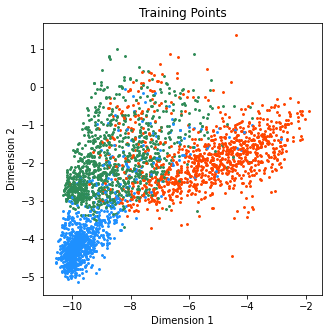

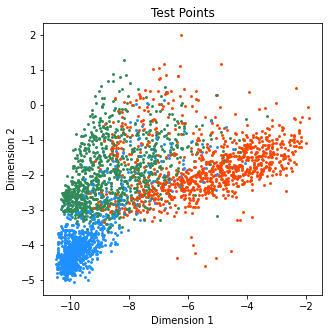

In [4]:
colors = ['orangered', 'dodgerblue', 'seagreen']
labels = ['t-shirt','trouser','dress']

train_reduced = np.dot(X,eigen_vec[:,0:2])
train_reduced = train_reduced
plt.figure(figsize = (5,5))
for i in range(N):
    plt.scatter(train_reduced[i,0],-train_reduced[i,1],marker = '8', color=colors[int(y[i])-1],s=4)
    
plt.title("Training Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
#plt.legend(loc = "lower right")

test_reduced = np.dot(X_test,eigen_vec[:,0:2])
plt.figure(figsize = (5,5))
for i in range(len(X_test)):
    plt.scatter(test_reduced[i,0],-test_reduced[i,1],marker = '8', color=colors[int(y_test[i])-1],s=4)
plt.title("Test Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
#plt.legend(label= labels,loc = "lower right")

plt.show()

# k-NN Algorithm

In [10]:
def kNN(X1, X2, X_truth,knn,classes):
    result=[]
    for i in range(len(X1[:,1])):
        distances = []
        for j in range(len(X2[:,1])):
            distances.append(distance.euclidean(X1[i,:],X2[j,:]))
        sorteddist=sorted(distances)
        if sorteddist[0]==0.0:
            sorteddist=sorteddist[1:knn+1]
        else:
            sorteddist=sorteddist[0:knn]

       # print(sorteddist)
        #print(distances)
        myclasses= []
        for t in range(knn):
            ind= distances.index(sorteddist[t])
            #print(ind)
            myclasses.append(int(X_truth[ind]))
        result.append(stats.mode(myclasses)[0])
    return np.array(result)


In [11]:
trainkNN = kNN(train_reduced,train_reduced, y,5,K)
print(confusion_matrix(y, trainkNN[:,0]))

testkNN = kNN(test_reduced,train_reduced,y,5,K)
print(confusion_matrix(y_test, testkNN[:,0]))

[[846  14 152]
 [ 39 816 119]
 [141  67 806]]
[[835   8 157]
 [ 49 851 100]
 [134  60 806]]
